## Define Imports and Determine Device

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## Define Imports and Determine Device
import os, sys
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
os.sys.path.insert(0, "source")
from DiabetesData import DiabeticData
from Autoencoder import ConvAutoencoder
from VGGAutoencoder import VGGAutoencoder
from ConvVarAutoencoder import ConvVAE
from DogCatData import DogCatData
%matplotlib inline

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
datatype="fruit"
batch_size=16
epochs = 100
model_file = ""
normalize=False
size=100

cuda


# read in data

In [3]:
if datatype == "diabetes":
    filename = "data/trainLabels_ad.csv"
    root_dir = "data/diabetes_resized"
    task = ([0],[4])
    # task = ([0,1,2], [3,4])
    # task = ([0,1,2], (3,4))
    classes = ["none", "proliferative"]
    train = pd.read_csv("data/diabetes_ad_train.csv")
    val = pd.read_csv("data/diabetes_ad_valid.csv")
    test = pd.read_csv("data/diabetes_ad_test.csv")

    print(Counter(train['level']))
    print(Counter(val['level']))
    print(Counter(test['level']))
    data = {'train': DiabeticData(df = train, transform_key="train", root_dir=root_dir, task = task, normalize = normalize),
            'valid': DiabeticData(df = val, transform_key="valid", root_dir=root_dir, task = task, normalize = normalize),
            'test': DiabeticData(df = test, transform_key="test", root_dir=root_dir, task = task, normalize = normalize)
            }


elif datatype == "dogcat":
    filename = "data/dogcat_ad.csv"
    root_dir = "data/dogcat/train"
    classes = ['dog', 'cat']
    # task = ([0,1,2], (3,4))

    train = pd.read_csv("data/dogcat_ad_train.csv")
    val = pd.read_csv("data/dogcat_ad_valid.csv")
    test = pd.read_csv("data/dogcat_ad_test.csv")
    print(Counter(train['text_label']))
    print(Counter(val['text_label']))
    print(Counter(test['text_label']))
    data = {'train': DogCatData(df = train, transform_key="train", root_dir=root_dir, normalize = normalize),
            'valid': DogCatData(df = val, transform_key="valid", root_dir=root_dir, normalize = normalize),
            'test': DogCatData(df = test, transform_key="test", root_dir=root_dir, normalize = normalize)
            }



elif datatype == "fruit":
    classes = ["apple", "banana"]
    root_dir="data/Fruit-Images-Dataset-master"
    train = pd.read_csv("data/fruit_ad_train.csv")
    val = pd.read_csv("data/fruit_ad_valid.csv")
    test = pd.read_csv("data/fruit_ad_test.csv")
    print(Counter(train['text_label']))
    print(Counter(val['text_label']))
    print(Counter(test['text_label']))
    data = {'train': DogCatData(df = train, transform_key="train", root_dir=root_dir, normalize = normalize),
            'valid': DogCatData(df = val, transform_key="valid", root_dir=root_dir, normalize = normalize),
            'test': DogCatData(df = test, transform_key="test", root_dir=root_dir, normalize = normalize)
            }

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
} 

Counter({'apple': 6404})
Counter({'apple': 1073, 'lemon': 77})
Counter({'apple': 1061, 'lemon': 89})
      Unnamed: 0                                  filename  label text_label
0              0         Training/Apple Braeburn/0_100.jpg      0      apple
1              1       Training/Apple Braeburn/100_100.jpg      0      apple
2              2       Training/Apple Braeburn/101_100.jpg      0      apple
3              3       Training/Apple Braeburn/102_100.jpg      0      apple
4              4       Training/Apple Braeburn/103_100.jpg      0      apple
...          ...                                       ...    ...        ...
6399        6399  Training/Apple Red Yellow 2/r_95_100.jpg      0      apple
6400        6400  Training/Apple Red Yellow 2/r_96_100.jpg      0      apple
6401        6401  Training/Apple Red Yellow 2/r_97_100.jpg      0      apple
6402        6402  Training/Apple Red Yellow 2/r_98_100.jpg      0      apple
6403        6403   Training/Apple Red Yellow 2/r_9_1

In [4]:
#model = VGGAutoencoder(device=device, task=datatype)
model = ConvAutoencoder(device=device, task=datatype)
print(model)
if model_file != "":
    model.load_state_dict(torch.load(model_file))

model.fit(epochs, dataloaders["train"], dataloaders["valid"])


  0%|          | 0/401 [00:00<?, ?it/s]

ConvAutoencoder(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 512, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(512, 3, kernel_size=(2, 2), stride=(2, 2))
  (criterion): MSELoss()
)
in fit function
Epoch: 1


/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 401/401 [00:44<00:00,  9.08it/s]


Epoch: 1 	Training Loss: 0.133621


  0%|          | 1/401 [00:00<00:43,  9.30it/s]

Epoch: 2


100%|██████████| 401/401 [00:43<00:00,  9.26it/s]


Epoch: 2 	Training Loss: 0.057413


  0%|          | 1/401 [00:00<00:43,  9.30it/s]

Epoch: 3


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 3 	Training Loss: 0.050609


  0%|          | 1/401 [00:00<00:42,  9.34it/s]

Epoch: 4


100%|██████████| 401/401 [00:43<00:00,  9.20it/s]


Epoch: 4 	Training Loss: 0.046233


  0%|          | 1/401 [00:00<00:43,  9.26it/s]

Epoch: 5


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 5 	Training Loss: 0.042885


  0%|          | 1/401 [00:00<00:42,  9.36it/s]

Epoch: 6


100%|██████████| 401/401 [00:43<00:00,  9.20it/s]


Epoch: 6 	Training Loss: 0.039724


  0%|          | 1/401 [00:00<00:43,  9.27it/s]

Epoch: 7


100%|██████████| 401/401 [00:43<00:00,  9.18it/s]


Epoch: 7 	Training Loss: 0.037729


  0%|          | 1/401 [00:00<00:43,  9.21it/s]

Epoch: 8


100%|██████████| 401/401 [00:43<00:00,  9.22it/s]


Epoch: 8 	Training Loss: 0.036504


  0%|          | 1/401 [00:00<00:43,  9.29it/s]

Epoch: 9


100%|██████████| 401/401 [00:43<00:00,  9.23it/s]


Epoch: 9 	Training Loss: 0.035262


  0%|          | 1/401 [00:00<00:42,  9.38it/s]

Epoch: 10


100%|██████████| 401/401 [00:43<00:00,  9.23it/s]


Epoch: 10 	Training Loss: 0.034137


  0%|          | 1/401 [00:00<00:42,  9.38it/s]

Epoch: 11


100%|██████████| 401/401 [00:44<00:00,  9.05it/s]


Epoch: 11 	Training Loss: 0.032762


  0%|          | 1/401 [00:00<00:53,  7.46it/s]

Epoch: 12


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 12 	Training Loss: 0.032007


  0%|          | 1/401 [00:00<00:42,  9.35it/s]

Epoch: 13


100%|██████████| 401/401 [00:43<00:00,  9.15it/s]


Epoch: 13 	Training Loss: 0.031390


  0%|          | 1/401 [00:00<00:42,  9.32it/s]

Epoch: 14


100%|██████████| 401/401 [00:43<00:00,  9.14it/s]


Epoch: 14 	Training Loss: 0.031072


  0%|          | 1/401 [00:00<00:43,  9.25it/s]

Epoch: 15


100%|██████████| 401/401 [00:43<00:00,  9.15it/s]


Epoch: 15 	Training Loss: 0.030273


  0%|          | 1/401 [00:00<00:43,  9.29it/s]

Epoch: 16


100%|██████████| 401/401 [00:44<00:00,  9.10it/s]


Epoch: 16 	Training Loss: 0.029966


  0%|          | 1/401 [00:00<00:43,  9.30it/s]

Epoch: 17


100%|██████████| 401/401 [00:43<00:00,  9.18it/s]


Epoch: 17 	Training Loss: 0.029902


  0%|          | 1/401 [00:00<00:43,  9.30it/s]

Epoch: 18


100%|██████████| 401/401 [00:51<00:00,  7.76it/s]


Epoch: 18 	Training Loss: 0.029257


  0%|          | 1/401 [00:00<00:48,  8.28it/s]

Epoch: 19


100%|██████████| 401/401 [01:05<00:00,  6.16it/s]


Epoch: 19 	Training Loss: 0.029295


  0%|          | 1/401 [00:00<00:43,  9.27it/s]

Epoch: 20


100%|██████████| 401/401 [00:43<00:00,  9.18it/s]


Epoch: 20 	Training Loss: 0.028890


  0%|          | 1/401 [00:00<00:42,  9.34it/s]

Epoch: 21


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 21 	Training Loss: 0.028664


  0%|          | 1/401 [00:00<00:43,  9.26it/s]

Epoch: 22


100%|██████████| 401/401 [01:02<00:00,  6.39it/s]


Epoch: 22 	Training Loss: 0.028596


  0%|          | 1/401 [00:00<00:47,  8.36it/s]

Epoch: 23


100%|██████████| 401/401 [00:53<00:00,  7.46it/s]


Epoch: 23 	Training Loss: 0.028109


  0%|          | 1/401 [00:00<00:43,  9.22it/s]

Epoch: 24


100%|██████████| 401/401 [00:48<00:00,  8.35it/s]


Epoch: 24 	Training Loss: 0.028362


  0%|          | 1/401 [00:00<00:49,  8.05it/s]

Epoch: 25


100%|██████████| 401/401 [01:05<00:00,  6.15it/s]


Epoch: 25 	Training Loss: 0.027583


  0%|          | 1/401 [00:00<00:42,  9.40it/s]

Epoch: 26


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 26 	Training Loss: 0.028020


  0%|          | 1/401 [00:00<00:42,  9.36it/s]

Epoch: 27


100%|██████████| 401/401 [00:43<00:00,  9.16it/s]


Epoch: 27 	Training Loss: 0.027478


  0%|          | 1/401 [00:00<00:43,  9.26it/s]

Epoch: 28


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 28 	Training Loss: 0.027418


  0%|          | 1/401 [00:00<00:42,  9.37it/s]

Epoch: 29


100%|██████████| 401/401 [00:43<00:00,  9.25it/s]


Epoch: 29 	Training Loss: 0.027705


KeyboardInterrupt: 

/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


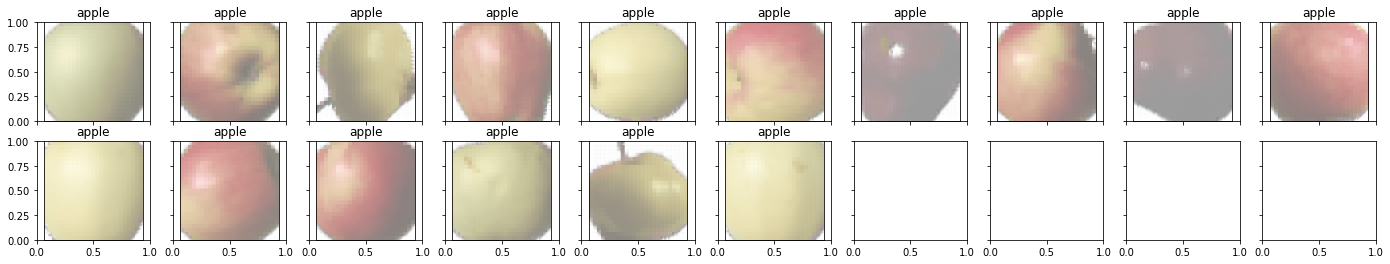

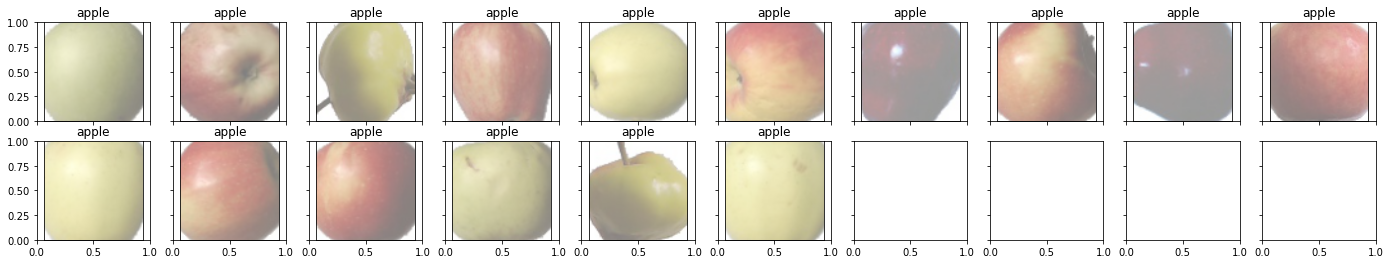

In [5]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))


# obtain one batch of test images
dataiter = iter(dataloaders["test"])
images, labels = dataiter.next()
images, labels = dataiter.next()

# get sample outputs
output = model(images.to(device))
# output = F.softmax(output)
# prep images for display
images = images.numpy()


# output is resized into a batch of iages
output = output.view(batch_size, 3, size, size)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# # plot the first ten input images and then reconstructed images
# fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))

# # input images on top row, reconstructions on bottom
# for images, row in zip([images, output], axes):
#     for img, ax in zip(images, row):
#         ax.imshow(np.squeeze(img))
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])


# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])


Now, we loop through the training set and calculate reconstruction loss 

In [6]:
dataloaders['valid'] = DataLoader(data['valid'], batch_size=1, shuffle=True)
dataloaders['test'] = DataLoader(data['test'], batch_size=1, shuffle=True)

results = []
results_cols = ["Image Label", "Reconstruction Loss"]
for x, y in dataloaders['valid']:
    X = x.to(device)
    output = model(X)
    output = output.cpu().detach().numpy()
    for i in range(y.shape[0]):
        ls = 0
        image = x[i].numpy()
        ouptut = output[i]
        label = y[i].numpy()
        ls = np.sum(np.square(image.ravel() - output.ravel()))
        # ls = model.criterion(output, image)
        results.append([label, ls])

results = pd.DataFrame(results, columns=results_cols)
results.to_csv("reconstruction_error.csv")


#find error threshold on validation set



#evaluate on testing data

     Image Label  Reconstruction Loss
0              0            31.686636
1              0            44.469845
2              0           116.750587
3              0            67.703079
4              0            25.547832
...          ...                  ...
1145           0            24.170588
1146           0            51.698326
1147           1            99.130753
1148           0            34.517715
1149           0            23.031116

[1150 rows x 2 columns]
     Image Label  Reconstruction Loss
0              0            31.686636
1              0            44.469845
2              0           116.750587
3              0            67.703079
4              0            25.547832
...          ...                  ...
1144           0            22.069206
1145           0            24.170588
1146           0            51.698326
1148           0            34.517715
1149           0            23.031116

[1073 rows x 2 columns]
     Image Label  Reconstruction Loss


Text(0, 0.5, 'Frequency')

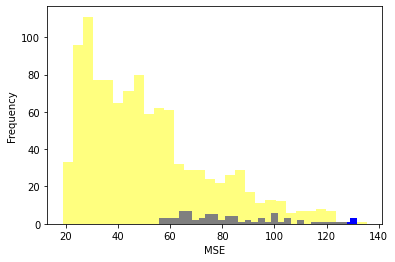

In [7]:
print(results)
label_1 = results[results["Image Label"] == 1]
label_0 = results[results["Image Label"] == 0]
print(label_0)
print(label_1)
avg_1 = np.mean(label_1['Reconstruction Loss'].values)
avg_0 = np.mean(label_0['Reconstruction Loss'].values)

print("Average Reconstruction Error (Prediction = 0)", avg_0)
print("Average Reconstruction Error (Prediction = 1)", avg_1)

plt.hist(label_1['Reconstruction Loss'].values, density=False, bins=30, color='blue')
plt.hist(label_0['Reconstruction Loss'].values, density=False, bins=30, alpha = 0.5,color='yellow')
plt.xlabel('MSE')
plt.ylabel('Frequency')


In [10]:
threshold = 75
y_true = []
y_pred = []
for x, y in dataloaders['test']:
    X = x.to(device)
    output = model(X)
    output = output.cpu().detach().numpy()
    for i in range(y.shape[0]):
        ls = 0
        image = x[i].numpy()
        ouptut = output[i]
        label = y[i].numpy()
        ls = np.sum(np.square(image.ravel() - output.ravel()))
        print("Label: {0}\tReconstruction Loss: {1}\tPrediction: {2}".format(label,ls,int(ls >= threshold)))
        y_true.append(label)
        if ls >= threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)

print(y_true)
print(y_pred)

Label: 0	Reconstruction Loss: 58.761775970458984	Prediction: 0
Label: 0	Reconstruction Loss: 45.58892059326172	Prediction: 0
Label: 0	Reconstruction Loss: 41.90203094482422	Prediction: 0
Label: 0	Reconstruction Loss: 46.178714752197266	Prediction: 0
Label: 0	Reconstruction Loss: 57.06621551513672	Prediction: 0
Label: 0	Reconstruction Loss: 94.66130065917969	Prediction: 1
Label: 0	Reconstruction Loss: 86.3909912109375	Prediction: 1
Label: 0	Reconstruction Loss: 26.785741806030273	Prediction: 0
Label: 0	Reconstruction Loss: 25.341320037841797	Prediction: 0
Label: 0	Reconstruction Loss: 24.090686798095703	Prediction: 0
Label: 0	Reconstruction Loss: 84.84156799316406	Prediction: 1
Label: 0	Reconstruction Loss: 82.81632995605469	Prediction: 1
Label: 1	Reconstruction Loss: 66.9463882446289	Prediction: 0
Label: 0	Reconstruction Loss: 42.630069732666016	Prediction: 0
Label: 0	Reconstruction Loss: 35.273555755615234	Prediction: 0
Label: 0	Reconstruction Loss: 28.96377182006836	Prediction: 0
Lab

Label: 0	Reconstruction Loss: 26.362140655517578	Prediction: 0
Label: 1	Reconstruction Loss: 99.56454467773438	Prediction: 1
Label: 0	Reconstruction Loss: 54.89495086669922	Prediction: 0
Label: 1	Reconstruction Loss: 66.47183990478516	Prediction: 0
Label: 0	Reconstruction Loss: 43.40541076660156	Prediction: 0
Label: 0	Reconstruction Loss: 104.42224884033203	Prediction: 1
Label: 0	Reconstruction Loss: 79.45347595214844	Prediction: 1
Label: 0	Reconstruction Loss: 42.364952087402344	Prediction: 0
Label: 0	Reconstruction Loss: 46.59073257446289	Prediction: 0
Label: 0	Reconstruction Loss: 26.958602905273438	Prediction: 0
Label: 0	Reconstruction Loss: 43.33692169189453	Prediction: 0
Label: 0	Reconstruction Loss: 34.818241119384766	Prediction: 0
Label: 0	Reconstruction Loss: 48.08061218261719	Prediction: 0
Label: 0	Reconstruction Loss: 77.45368957519531	Prediction: 1
Label: 0	Reconstruction Loss: 57.02962875366211	Prediction: 0
Label: 0	Reconstruction Loss: 28.369182586669922	Prediction: 0
La

Label: 0	Reconstruction Loss: 53.291019439697266	Prediction: 0
Label: 1	Reconstruction Loss: 97.35336303710938	Prediction: 1
Label: 0	Reconstruction Loss: 40.06188201904297	Prediction: 0
Label: 0	Reconstruction Loss: 70.47687530517578	Prediction: 0
Label: 0	Reconstruction Loss: 112.24620056152344	Prediction: 1
Label: 0	Reconstruction Loss: 71.80171966552734	Prediction: 0
Label: 0	Reconstruction Loss: 79.26889038085938	Prediction: 1
Label: 0	Reconstruction Loss: 72.68386840820312	Prediction: 0
Label: 1	Reconstruction Loss: 68.4408187866211	Prediction: 0
Label: 0	Reconstruction Loss: 123.91905975341797	Prediction: 1
Label: 0	Reconstruction Loss: 42.33667755126953	Prediction: 0
Label: 0	Reconstruction Loss: 40.56673812866211	Prediction: 0
Label: 0	Reconstruction Loss: 51.38643264770508	Prediction: 0
Label: 0	Reconstruction Loss: 40.614906311035156	Prediction: 0
Label: 0	Reconstruction Loss: 73.67305755615234	Prediction: 0
Label: 0	Reconstruction Loss: 23.056907653808594	Prediction: 0
Labe

Label: 0	Reconstruction Loss: 115.63299560546875	Prediction: 1
Label: 0	Reconstruction Loss: 47.98937225341797	Prediction: 0
Label: 0	Reconstruction Loss: 67.1691665649414	Prediction: 0
Label: 0	Reconstruction Loss: 55.29696273803711	Prediction: 0
Label: 0	Reconstruction Loss: 34.997886657714844	Prediction: 0
Label: 1	Reconstruction Loss: 87.90833282470703	Prediction: 1
Label: 0	Reconstruction Loss: 112.31842803955078	Prediction: 1
Label: 0	Reconstruction Loss: 32.85133361816406	Prediction: 0
Label: 0	Reconstruction Loss: 124.43313598632812	Prediction: 1
Label: 0	Reconstruction Loss: 137.94818115234375	Prediction: 1
Label: 0	Reconstruction Loss: 25.72962188720703	Prediction: 0
Label: 0	Reconstruction Loss: 44.47004318237305	Prediction: 0
Label: 0	Reconstruction Loss: 84.53765106201172	Prediction: 1
Label: 0	Reconstruction Loss: 24.879791259765625	Prediction: 0
Label: 0	Reconstruction Loss: 35.56608581542969	Prediction: 0
Label: 0	Reconstruction Loss: 65.86360931396484	Prediction: 0
Lab

Label: 0	Reconstruction Loss: 25.87890625	Prediction: 0
Label: 0	Reconstruction Loss: 36.446102142333984	Prediction: 0
Label: 0	Reconstruction Loss: 92.63925170898438	Prediction: 1
Label: 0	Reconstruction Loss: 25.628158569335938	Prediction: 0
Label: 0	Reconstruction Loss: 25.71072769165039	Prediction: 0
Label: 0	Reconstruction Loss: 38.43408203125	Prediction: 0
Label: 0	Reconstruction Loss: 49.91285705566406	Prediction: 0
Label: 0	Reconstruction Loss: 34.79216003417969	Prediction: 0
Label: 0	Reconstruction Loss: 82.17330932617188	Prediction: 1
Label: 0	Reconstruction Loss: 25.423873901367188	Prediction: 0
Label: 0	Reconstruction Loss: 125.26944732666016	Prediction: 1
Label: 0	Reconstruction Loss: 20.946237564086914	Prediction: 0
Label: 0	Reconstruction Loss: 30.326854705810547	Prediction: 0
Label: 0	Reconstruction Loss: 31.759632110595703	Prediction: 0
Label: 0	Reconstruction Loss: 24.95456886291504	Prediction: 0
Label: 0	Reconstruction Loss: 26.957605361938477	Prediction: 0
Label: 1	

Label: 0	Reconstruction Loss: 29.504993438720703	Prediction: 0
Label: 0	Reconstruction Loss: 62.97492218017578	Prediction: 0
Label: 0	Reconstruction Loss: 22.475528717041016	Prediction: 0
Label: 0	Reconstruction Loss: 47.422332763671875	Prediction: 0
Label: 0	Reconstruction Loss: 57.200565338134766	Prediction: 0
Label: 0	Reconstruction Loss: 72.47004699707031	Prediction: 0
Label: 0	Reconstruction Loss: 30.66280746459961	Prediction: 0
Label: 0	Reconstruction Loss: 113.90034484863281	Prediction: 1
Label: 0	Reconstruction Loss: 48.43914031982422	Prediction: 0
Label: 0	Reconstruction Loss: 79.27974700927734	Prediction: 1
Label: 0	Reconstruction Loss: 93.2379379272461	Prediction: 1
Label: 0	Reconstruction Loss: 22.60702896118164	Prediction: 0
Label: 0	Reconstruction Loss: 58.810298919677734	Prediction: 0
Label: 0	Reconstruction Loss: 84.19461059570312	Prediction: 1
Label: 0	Reconstruction Loss: 44.952964782714844	Prediction: 0
Label: 0	Reconstruction Loss: 33.49454116821289	Prediction: 0
La

Label: 0	Reconstruction Loss: 23.755210876464844	Prediction: 0
Label: 0	Reconstruction Loss: 50.24595642089844	Prediction: 0
Label: 0	Reconstruction Loss: 23.140483856201172	Prediction: 0
Label: 0	Reconstruction Loss: 35.48197937011719	Prediction: 0
Label: 0	Reconstruction Loss: 33.801353454589844	Prediction: 0
Label: 0	Reconstruction Loss: 26.01839828491211	Prediction: 0
Label: 0	Reconstruction Loss: 101.62850952148438	Prediction: 1
Label: 0	Reconstruction Loss: 58.995826721191406	Prediction: 0
Label: 0	Reconstruction Loss: 27.71710205078125	Prediction: 0
Label: 0	Reconstruction Loss: 36.887874603271484	Prediction: 0
Label: 1	Reconstruction Loss: 145.42999267578125	Prediction: 1
Label: 0	Reconstruction Loss: 39.45555877685547	Prediction: 0
Label: 0	Reconstruction Loss: 106.89092254638672	Prediction: 1
Label: 0	Reconstruction Loss: 21.904159545898438	Prediction: 0
Label: 0	Reconstruction Loss: 43.253501892089844	Prediction: 0
Label: 0	Reconstruction Loss: 52.29527282714844	Prediction: 

Label: 0	Reconstruction Loss: 33.43323516845703	Prediction: 0
Label: 0	Reconstruction Loss: 24.62070655822754	Prediction: 0
Label: 0	Reconstruction Loss: 56.12905502319336	Prediction: 0
Label: 0	Reconstruction Loss: 54.380401611328125	Prediction: 0
Label: 0	Reconstruction Loss: 36.57805252075195	Prediction: 0
Label: 0	Reconstruction Loss: 40.10064697265625	Prediction: 0
Label: 0	Reconstruction Loss: 48.028564453125	Prediction: 0
Label: 0	Reconstruction Loss: 45.54989242553711	Prediction: 0
Label: 0	Reconstruction Loss: 40.74701690673828	Prediction: 0
Label: 0	Reconstruction Loss: 36.59236526489258	Prediction: 0
Label: 0	Reconstruction Loss: 29.853784561157227	Prediction: 0
Label: 0	Reconstruction Loss: 24.169517517089844	Prediction: 0
Label: 0	Reconstruction Loss: 67.5641860961914	Prediction: 0
Label: 1	Reconstruction Loss: 80.13008117675781	Prediction: 1
Label: 0	Reconstruction Loss: 26.02817153930664	Prediction: 0
Label: 0	Reconstruction Loss: 52.8444938659668	Prediction: 0
Label: 0	

In [11]:
accuracy = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)
print("Confusion Matrix: ", cm)

Accuracy:  0.8191304347826087
Precision:  0.2510460251046025
Recall:  0.6741573033707865
F1-Score:  0.36585365853658536
Confusion Matrix:  [[882 179]
 [ 29  60]]
